Topic:        Challenge Set 5  
Subject:      Linear Regression and Train Test Split challenges
Date:         10/9/2017  
Name:         Pradnya Nimkar

In [1]:
from __future__ import print_function, division
import requests
from bs4 import BeautifulSoup
import re
import dateutil.parser
import pandas as pd
from decimal import *
from datetime import datetime, timedelta
from pandas import ExcelWriter
from dateutil import parser
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import RidgeCV
import numpy as np
from sklearn.metrics import r2_score
from sklearn.externals.six import StringIO


%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)
from sklearn.cross_validation import train_test_split

from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV

/Users/pradnyanimkar/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#### Challenge 1

Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross). How can you interpret the results of this model? What does it predict? Make a plot of predictions against actual outcome. Make a histogram of residuals. How are the residuals distributed?

In [2]:
total_movies = pd.read_csv('total_movies')
total_movies.drop(['Unnamed: 0', 'index'], axis = 1,errors='ignore', inplace = True)

In [3]:
total_movies.columns

Index(['Actor', 'Close_Date', 'Composer', 'Director', 'Distributor', 'Genre',
       'In_Release', 'MPAA Rating', 'Opening_Weekend', 'Other_Text',
       'Producer', 'Production Budget', 'Release Date', 'Runtime', 'Theaters',
       'Unnamed: 0.1', 'Writer', 'domestic_sales', 'foreign_sales', 'title',
       'worldwide_sales'],
      dtype='object')

In [5]:
total_movies['Intercept'] = 1
total_movies['Intercept'].head()

0    1
1    1
2    1
3    1
4    1
Name: Intercept, dtype: int64

In [34]:
df.isnull().sum()

Actor                2161
Close_Date            684
Composer             2445
Director             1735
Distributor             0
Genre                   0
In_Release            725
MPAA Rating             0
Opening_Weekend       320
Other_Text             10
Producer             2317
Production Budget    2246
Release Date            0
Runtime                50
Theaters              316
Unnamed: 0.1         1321
Writer               1983
domestic_sales          0
foreign_sales        1917
title                   0
worldwide_sales      1172
Intercept               0
dtype: int64

In [9]:
# Focus on main stream movies : Filter on movies that run atleast 75 minutes : 1 hour 15 minutes
total_movies_model = total_movies[total_movies['Runtime'] > 75 ].reset_index() # droped about 179 movies
total_movies_model = total_movies[total_movies['MPAA Rating'] != "NC-17" ] # Dropping movies with Unknown rating (10) and NC-17 (2)
total_movies_model = total_movies[total_movies['MPAA Rating'] != "Unknown" ]
total_movies_model.dropna(axis=0, how='all') # Dropping rows which has all the NaNs

,Actor,Close_Date,Composer,Director,Distributor,Genre,In_Release,MPAA Rating,Opening_Weekend,Other_Text,...,Release Date,Runtime,Theaters,Unnamed: 0.1,Writer,domestic_sales,foreign_sales,title,worldwide_sales,Intercept
0,NaN,NaN,NaN,Andres Muschietti,Warner Bros. (New Line),Horror,NaN,R,123403419.000,"(#1 rank, 4,103 theaters, $30,076 average)",...,2017-09-08 00:00:00,135.000,4148.000,nan,Cary Fukunaga,291182790.000,264800000.000,It,555982790.000,1
1,John Boyega,2016-06-02 00:00:00,John Williams,J.J. Abrams,Buena Vista,Sci-Fi Fantasy,168 days / 24 weeks,PG-13,247966675.000,"(#1 rank, 4,134 theaters, $59,982 average)",...,2015-12-18 00:00:00,136.000,4134.000,nan,J.J. Abrams,936662225.000,1131561399.000,Star Wars: The Force Awakens,2068223624.000,1
2,Omar Sy,2015-11-19 00:00:00,Michael Giacchino,Colin Trevorrow,Universal,Action / Adventure,NaN,PG-13,208806270.000,"(#1 rank, 4,274 theaters, $48,855 average)",...,2015-06-12 00:00:00,124.000,4291.000,nan,Derek Connolly,652270625.000,1019442583.000,Jurassic World,1671713208.000,1
3,"Robert Downey, Jr.",2015-10-08 00:00:00,Danny Elfman,Joss Whedon,Buena Vista,Action / Adventure,161 days / 23 weeks,PG-13,191271109.000,"(#1 rank, 4,276 theaters, $44,731 average)",...,2015-05-01 00:00:00,141.000,4276.000,nan,Joss Whedon,459005868.000,946397826.000,Avengers: Age of Ultron,1405403694.000,1
4,Mindy Kaling,2015-12-10 00:00:00,Michael Giacchino,Pete Docter,Buena Vista,Animation,175 days / 25 weeks,PG,90440272.000,"(#2 rank, 3,946 theaters, $22,919 average)",...,2015-06-19 00:00:00,94.000,4158.000,nan,Josh Cooley,356461711.000,501149463.000,Inside Out,857611174.000,1
5,Tony Jaa,2015-07-24 00:00:00,Brian Tyler,James Wan,Universal,Action,NaN,PG-13,147187040.000,"(#1 rank, 4,004 theaters, $36,760 average)",...,2015-04-03 00:00:00,137.000,4022.000,nan,Chris Morgan,353007020.000,1163038891.000,Furious 7,1516045911.000,1
6,Sandra Bullock,2015-12-17 00:00:00,Heitor Pereira,Pierre Coffin,Universal,Animation,161 days / 23 weeks,PG,115718405.000,"(#1 rank, 4,301 theaters, $26,905 average)",...,2015-07-10 00:00:00,91.000,4311.000,nan,Brian Lynch,336045770.000,823352627.000,Minions,1159398397.000,1
7,Jennifer Lawrence,2016-02-25 00:00:00,NaN,Francis Lawrence,Lionsgate,Action / Adventure,98 days / 14 weeks,PG-13,102665981.000,"(#1 rank, 4,175 theaters, $24,591 average)",...,2015-11-20 00:00:00,137.000,4175.000,nan,Peter Craig,281723902.000,371704359.000,The Hunger Games: Mockingjay - Part 2,653428261.000,1
8,Sean Bean,2016-03-17 00:00:00,Dariusz Wolski,Ridley Scott,Fox,Sci-Fi,168 days / 24 weeks,PG-13,54308575.000,"(#1 rank, 3,831 theaters, $14,176 average)",...,2015-10-02 00:00:00,141.000,3854.000,nan,Drew Goddard,228433663.000,401728227.000,The Martian,630161890.000,1
9,Cate Blanchett,2015-09-17 00:00:00,NaN,Kenneth Branagh,Buena Vista,Fantasy,189 days / 27 weeks,PG,67877361.000,"(#1 rank, 3,845 theaters, $17,653 average)",...,2015-03-13 00:00:00,112.000,3848.000,nan,Chris Weitz,201151353.000,342363000.000,Cinderella,543514353.000,1


In [27]:
total_movies_model.shape

(2576, 22)

In [29]:
df = total_movies_model.dropna(subset =['domestic_sales'],axis = 0 )

In [30]:
df.shape

(2573, 22)

In [39]:
selected_columns2 =['Intercept']
lr_model = LinearRegression()
lr_model2.fit(df.loc[:,selected_columns2],df['domestic_sales'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
lr_model2.intercept_

14627359.183908045

How can you interpret the results of this model? What does it predict? 

It predicts y but only with a single value for all x values. The line is parallel to x-axis 
intercepting at y axis at 14627359.183908045

In [44]:
test_set_pred2 = lr_model2.predict(df.loc[:,selected_columns2])

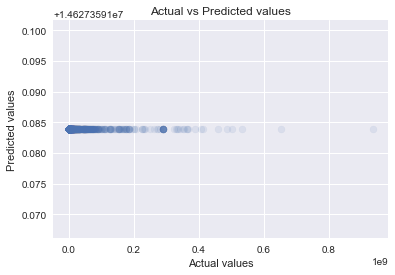

In [48]:
plt.scatter(df['domestic_sales'],test_set_pred2,alpha=.1)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')

(array([  2.09700000e+03,   9.40000000e+01,   6.20000000e+01,
          3.90000000e+01,   2.70000000e+01,   3.90000000e+01,
          2.00000000e+01,   1.50000000e+01,   1.20000000e+01,
          1.40000000e+01,   5.00000000e+00,   6.00000000e+00,
          3.00000000e+00,   1.00000000e+01,   2.00000000e+00,
          2.00000000e+00,   9.00000000e+00,   5.00000000e+00,
          7.00000000e+00,   7.00000000e+00,   1.00000000e+00,
          3.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          5.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   1.50000000e+01,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   3.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   3.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

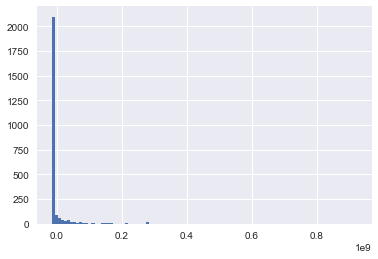

In [53]:
error = df['domestic_sales'] - test_set_pred2
plt.hist(error, bins =100)

Distribution of residual plot is right skewed

#### Challenge 2

Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. Also add plots of model prediction against your feature variable and residuals against feature variable. How can you interpret what's happening in the model?

In [36]:
df = df.dropna(subset =['Runtime'],axis = 0 )

In [54]:
selected_columns =['Runtime']

lr_model3 = LinearRegression()
lr_model3.fit(df.loc[:,selected_columns],df['domestic_sales'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [55]:
test_set_pred2 = lr_model3.predict(df.loc[:,selected_columns])

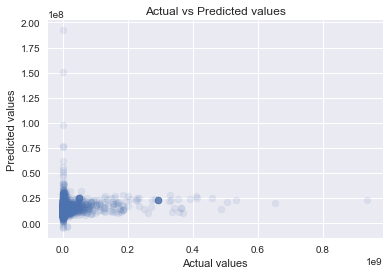

In [56]:
plt.scatter(df['domestic_sales'],test_set_pred2,alpha=.1)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')

(array([  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   2.00000000e+00,   1.00000000e+00,
          4.00000000e+00,   5.00000000e+00,   4.20000000e+01,
          5.34000000e+02,   1.49700000e+03,   1.13000000e+02,
          7.40000000e+01,   5.50000000e+01,   2.60000000e+01,
          2.60000000e+01,   1.30000000e+01,   1.80000000e+01,
          9.00000000e+00,   8.00000000e+00,   5.00000000e+00,
          8.00000000e+00,   3.00000000e+00,   9.00000000e+00,
          6.00000000e+00,   6.00000000e+00,   8.00000000e+00,
          3.00000000e+00,   1.00000000e+00,   3.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   4.00000000e+00,   1.50000000e+01,
          0.00000000e+00,   0.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   2.00000000e+00,   1.00000000e+00,
        

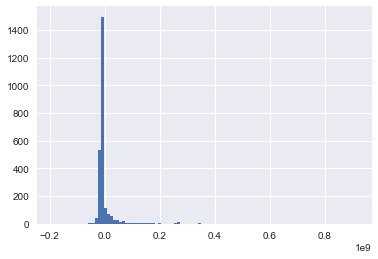

In [58]:
error2 = df['domestic_sales'] - test_set_pred2
plt.hist(error2, bins =100)

The error graph is now less right skewed. Starting to look slighly more normal

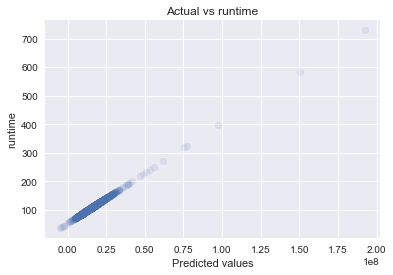

In [60]:
# model prediction against feature variable
plt.scatter(test_set_pred2,df['Runtime'],alpha=.1)
plt.ylabel('runtime')
plt.xlabel('Predicted values')
plt.title('Predicted vs runtime')

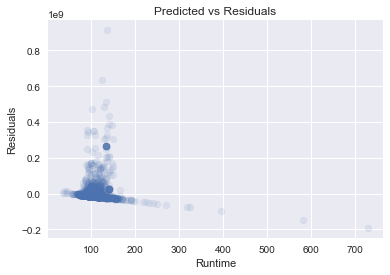

In [62]:
#residuals against feature variable

error3 = df['domestic_sales'] - test_set_pred2
plt.scatter(df['Runtime'],error3,alpha=.1)
plt.ylabel('Residuals')
plt.xlabel('Runtime')
plt.title('Predicted vs Residuals')

How can you interpret what's happening in the model? For runtime <200, the model is overpredicting as the residuals are greater than zero and for >200 runtime the model is underpredicting.



#### Challenge 3

Repeat the process of challenge 1, but add a categorical feature (like genre). You'll have to convert a column of text into a number of numerical columns ("dummy variables"). How can you interpret what's happening in the model?

In [78]:
df.isnull().sum()

Actor                2112
Close_Date            668
Composer             2395
Director             1689
Distributor             0
Genre                   0
In_Release            709
MPAA Rating             0
Opening_Weekend       312
Other_Text             10
Producer             2268
Production Budget    2196
Release Date            0
Runtime                 0
Theaters              308
Unnamed: 0.1         1285
Writer               1935
domestic_sales          0
foreign_sales        1873
title                   0
worldwide_sales      1138
Intercept               0
dtype: int64

In [84]:
df3 = pd.concat([df,pd.get_dummies(df['MPAA Rating']) ], axis =1)       

In [85]:
df3.shape

(2523, 29)

In [86]:
selected_columns_2 = [ 'PG', 'PG-13','G' ,'R','NC-17','Not Yet Rated',  'Runtime']
       

In [87]:
lr_model4 = LinearRegression()
lr_model4.fit(df3.loc[:,selected_columns_2],df3['domestic_sales'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [89]:
test_set_pred4 = lr_model4.predict(df3.loc[:,selected_columns_2])

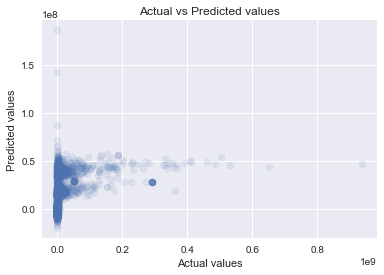

In [90]:
plt.scatter(df['domestic_sales'],test_set_pred4,alpha=.1)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')

 How can you interpret what's happening in the model? If the model was predicting correctly we would see a linear pattern
In this case, it seems like model is overpredicting

(array([   1.,    0.,    0.,    0.,    1.,    0.,    0.,    0.,    0.,
           1.,    1.,    5.,   34.,  159.,  199.,  450.,  442.,  890.,
         145.,   40.,   21.,   20.,    9.,    4.,    8.,   11.,    7.,
           4.,    5.,   12.,    3.,    6.,    0.,    2.,    2.,    2.,
           1.,    2.,    0.,    1.,    1.,   15.,    0.,    3.,    2.,
           1.,    2.,    1.,    0.,    2.,    1.,    1.,    0.,    0.,
           0.,    1.,    0.,    0.,    1.,    1.,    0.,    0.,    1.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.]),
 array([ -1.85900583e+08,  -1.75144137e+08,  -1.64387692e+08,
         -1.53631247e+08,  -1.42874802e+08,  -1.32118356e+08,
         -1.21361911e+08,  -1.10605466e+08,  -9.98490203e+07,
         -8.90925750e+07

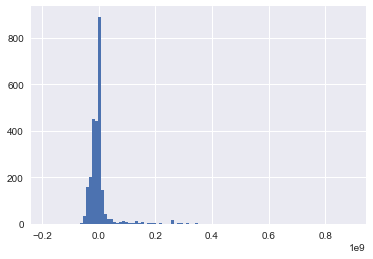

In [92]:
error3 = df3['domestic_sales'] - test_set_pred4
plt.hist(error3, bins =100)

#### Challenge 4

Enhance your model further by adding more features and/or transforming existing features. Think about how you build the model matrix and how to interpret what the model is doing.

In [93]:
mean_theatre = df3['Theaters'].mean()
df3['Theaters'] = df3['Theaters'].fillna(value=mean_theatre)

In [94]:
# Creating distributor column

Top_10 = ['Buena Vista', 'Warner Bros.', 'Lionsgate/Summit', 'Fox', 'Clarius Entertainment', 'Paramount, Sony / Columbia', 'Universal', 'Weinstein / Dimension', 'Well Go USA', 'Lionsgate']

df3['Top_10_distributor'] = df3['Distributor'].apply(lambda x : x if x in Top_10  else "Other")

In [95]:
df4 = pd.concat([df3,pd.get_dummies(df3['Top_10_distributor']) ], axis =1)       

In [101]:
selected_columns_5 = [ 'Runtime', 'Theaters','PG', 'PG-13','G' ,'R','NC-17','Not Yet Rated', 'Buena Vista',
       'Clarius Entertainment', 'Fox', 'Lionsgate', 'Lionsgate/Summit',
       'Other', 'Universal', 'Warner Bros.', 'Weinstein / Dimension',
       'Well Go USA']
       

In [103]:
df4.isnull().sum()

Actor                    2112
Close_Date                668
Composer                 2395
Director                 1689
Distributor                 0
Genre                       0
In_Release                709
MPAA Rating                 0
Opening_Weekend           312
Other_Text                 10
Producer                 2268
Production Budget        2196
Release Date                0
Runtime                     0
Theaters                    0
Unnamed: 0.1             1285
Writer                   1935
domestic_sales              0
foreign_sales            1873
title                       0
worldwide_sales          1138
Intercept                   0
G                           0
NC-17                       0
Not Yet Rated               0
PG                          0
PG-13                       0
R                           0
Unrated                     0
Top_10_distributor          0
Buena Vista                 0
Clarius Entertainment       0
Fox                         0
Lionsgate 

In [104]:
lr_model5 = LinearRegression()
lr_model5.fit(df4.loc[:,selected_columns_5],df4['domestic_sales'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [105]:
test_set_pred5 = lr_model5.predict(df4.loc[:,selected_columns_5])

In [107]:
# R-square
r2_score(df4['domestic_sales'], test_set_pred5)

0.34198386099806866

Challenge 5

Fitting and checking predictions on the exact same data set can be
misleading. Divide your data into two sets: a training and a test set
(roughly 75% training, 25% test is a fine split). Fit a model on the
training set, check the predictions (by plotting versus actual values)
in the test set.

In [118]:
df4.columns

Index(['Actor', 'Close_Date', 'Composer', 'Director', 'Distributor', 'Genre',
       'In_Release', 'MPAA Rating', 'Opening_Weekend', 'Other_Text',
       'Producer', 'Production Budget', 'Release Date', 'Runtime', 'Theaters',
       'Unnamed: 0.1', 'Writer', 'domestic_sales', 'foreign_sales', 'title',
       'worldwide_sales', 'Intercept', 'G', 'NC-17', 'Not Yet Rated', 'PG',
       'PG-13', 'R', 'Unrated', 'Top_10_distributor', 'Buena Vista',
       'Clarius Entertainment', 'Fox', 'Lionsgate', 'Lionsgate/Summit',
       'Other', 'Universal', 'Warner Bros.', 'Weinstein / Dimension',
       'Well Go USA'],
      dtype='object')

In [124]:
#Split the data 75-25 train/test


X = df4.loc[:,['Runtime', 'Theaters','Buena Vista',
    'Clarius Entertainment', 'Fox', 'Lionsgate', 'Lionsgate/Summit',
       'Other', 'Universal', 'Warner Bros.', 'Weinstein / Dimension',
       'Well Go USA','PG', 'PG-13','G' ,'R','NC-17','Not Yet Rated']]



y = df4['domestic_sales']



In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)

In [126]:
selected_columns_6 = ['Runtime', 'Theaters','Buena Vista',
    'Clarius Entertainment', 'Fox', 'Lionsgate', 'Lionsgate/Summit',
       'Other', 'Universal', 'Warner Bros.', 'Weinstein / Dimension',
       'Well Go USA','PG', 'PG-13','G' ,'R','NC-17','Not Yet Rated']

In [127]:
lr_model6 = LinearRegression()
lr_model6.fit(X_train.loc[:,selected_columns_6],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [128]:
test_set_pred2 = lr_model6.predict(X_test.loc[:,selected_columns_6])

In [129]:
# R-square
r2_score(y_test, test_set_pred2)

0.27284722220649482

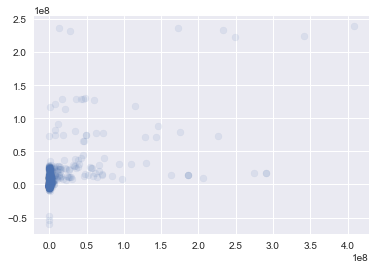

In [130]:
plt.scatter(y_test, test_set_pred2,alpha=.1)
